# Mission Launches to Space

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('mission_launches.csv')

In [3]:
display(df)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Data Cleaning

In [4]:
df= df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [6]:
df['price'] = df['Price'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'],format = 'mixed', dayfirst = True)

for index,row in df.iterrows():
    df.at[index, 'Date'] = row['Date'].date()

In [7]:
display(df['Date'])

0       2020-08-07
1       2020-08-06
2       2020-08-04
3       2020-07-30
4       2020-07-30
           ...    
4319    1958-02-05
4320    1958-02-01
4321    1957-12-06
4322    1957-11-03
4323    1957-10-04
Name: Date, Length: 4324, dtype: object

In [7]:
df['Country']=df['Location'].apply(lambda row: row.split(",")[-1]).astype(str).str.strip()
df['Centre']=df['Location'].apply(lambda row: row.split(",")[1]).astype(str).str.strip()
df = df.reindex(columns=['Organisation', 'Location','Country','Centre','Date', 'Detail', 'Rocket_Status', 'Price','Mission_Status'])

print('how many duplicates we have ?')
df.duplicated().sum()

how many duplicates we have ?


1

In [8]:
df['Rocket_type'] = df['Detail'].str.split('|').apply(lambda x:x[0])
df['Rocket_model']= df['Detail'].str.split('|').apply(lambda x:x[0].split(' ')[0]).apply(lambda x:x.split('-')[0])
df['price'] = df['Price'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'],format = 'mixed', dayfirst = True)

for index,row in df.iterrows():
    df.at[index, 'Date'] = row['Date'].date()

In [9]:
df.head()

,Organisation,Location,Country,Centre,Date,Detail,Rocket_Status,Price,Mission_Status,Rocket_type,Rocket_model,price
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,Kennedy Space Center,2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Falcon 9 Block 5,Falcon,50.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,Jiuquan Satellite Launch Center,2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Long March 2D,Long,29.75
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,Boca Chica,2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Starship Prototype,Starship,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,Baikonur Cosmodrome,2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Proton-M/Briz-M,Proton,65.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,Cape Canaveral AFS,2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Atlas V 541,Atlas,145.00


In [11]:
print('There are {} rockets with null prices'.format(df['Price'].isnull().sum()))
no_price = df[df['Price'].isnull()]['Rocket_model'].unique().tolist()
price = df[df['Price'].notnull()]['Rocket_model'].unique().tolist()

check =  [rocket for rocket in no_price if rocket in price]

print('Here is the list of rocket model that can be with no price but display a price elsewhere in the dataset') 

There are 3360 rockets with null prices
Here is the list of rocket model that can be with no price but display a price elsewhere in the dataset


In [12]:
print('There are {} rockets with null prices'.format(df['Price'].isnull().sum()))

no_price = df[df['Price'].isnull()]['Rocket_model'].unique().tolist()
price = df[df['Price'].notnull()]['Rocket_model'].unique().tolist()

check =  [rocket for rocket in no_price if rocket in price]

print('Here is the list of rocket model that can be with no price but display a price elsewhere in the dataset')      
check

There are 3360 rockets with null prices
Here is the list of rocket model that can be with no price but display a price elsewhere in the dataset


['Long',
 'Soyuz',
 'Kuaizhou',
 'Atlas',
 'Delta',
 'PSLV',
 'Ariane',
 'H',
 'Epsilon',
 'Titan',
 'Proton',
 'Rokot/Briz',
 'Saturn']

In [13]:
len(check)

13

In [14]:
Mission_counts = df.groupby('Country').count()
highest_Mission_Launches = Mission_counts.idxmax()
print("Company with Highest Mission Launches:" , highest_Mission_Launches)

Company with Highest Mission Launches: Organisation      Russia
Location          Russia
Centre            Russia
Date              Russia
Detail            Russia
Rocket_Status     Russia
Price                USA
Mission_Status    Russia
Rocket_type       Russia
Rocket_model      Russia
price                USA
dtype: object


# Launche Date of Rockets by Year wise

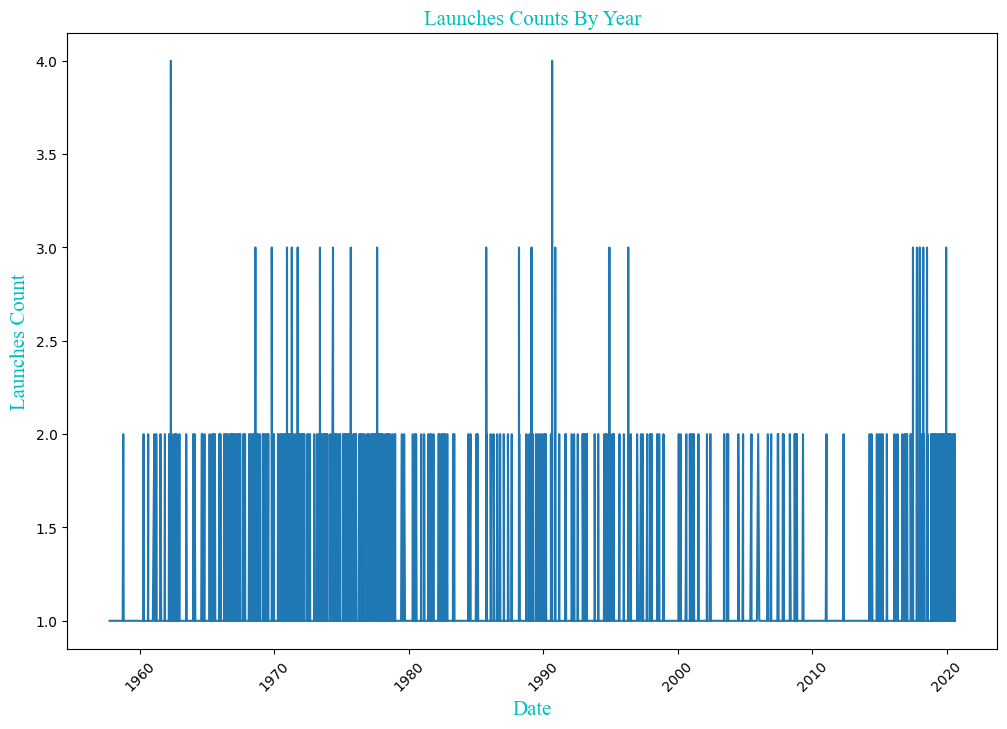

In [18]:

Launches_count_by_date = df.groupby('Date').count()
missions_by_date = df.groupby('Date').size()

plt.figure(figsize=(12, 8))
missions_by_date.plot(kind='line')

plt.xlabel("Date",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.ylabel("Launches Count",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.title("Launches Counts By Year",fontsize = 15,fontname = 'Times New Roman',color = 'c')
plt.xticks(rotation=45)
plt.show()

# Mission Launches by a Country by percentage Wise

Busiest country for mission launches: Russia


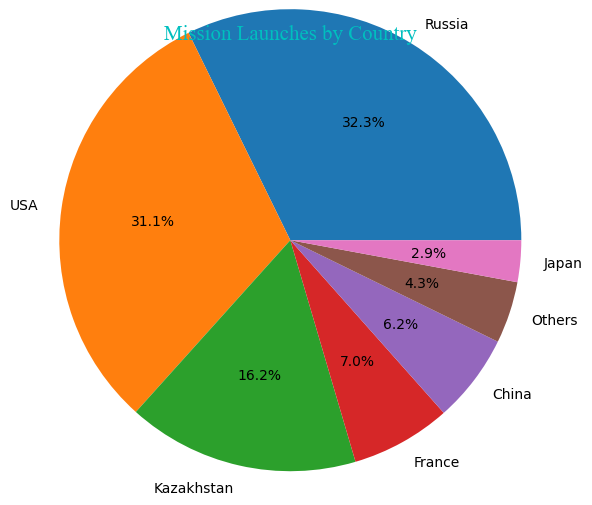

In [26]:
Mission_counts = df['Country'].value_counts()
busiest_country = Mission_counts.idxmax()

print("Busiest country for mission launches:", busiest_country)

df['Country'] = df['Country'].fillna('Unknown') 

# Get the top 7 countries
top_countries = Mission_counts.head(7).index.tolist()

# Group remaining countries as "Others"
df['Country'] = df['Country'].apply(lambda x: x if x in top_countries else 'Others')

Mission_counts = df['Country'].value_counts()
labels = Mission_counts.index
counts = Mission_counts.values
percentages = counts / counts.sum() * 100

plt.figure(figsize=(5, 5)) 

# Create a pie chart to visualize mission launches by country
plt.pie(percentages, labels=labels, autopct='%0.1f%%', radius=1.5)

plt.title("Mission Launches by Country", fontsize=15, fontname='Times New Roman', color='c')
plt.show()


# Active Count of Rockets by each Country

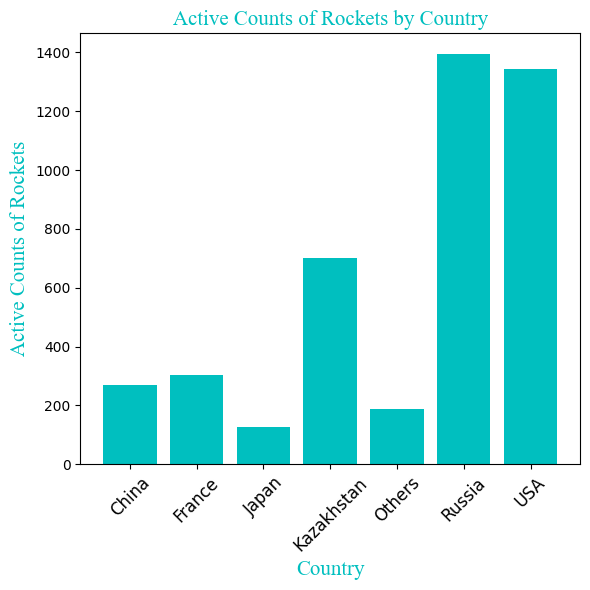

In [31]:

Mission_Success_Counts = df.groupby('Country').count()
Mission_Success_Counts = Mission_Success_Counts['Mission_Status']

plt.figure(figsize=(6, 6))
plt.bar(Mission_Success_Counts.index, Mission_Success_Counts.values, color='c')

plt.xlabel("Country", fontsize=15, fontname='Times New Roman', color='c')
plt.ylabel("Active Counts of Rockets", fontsize=15, fontname='Times New Roman', color='c')
plt.title("Active Counts of Rockets by Country", fontsize=15, fontname='Times New Roman', color='c')
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout() 
plt.show()


# How Many Rockets are active Currently Right Now


In [21]:
Year_wise_Status = df.groupby('Rocket_Status')['Date'].count()
print("Status of Rockets Year Wise:",Year_wise_Status)


Status of Rockets Year Wise: Rocket_Status
StatusActive      790
StatusRetired    3534
Name: Date, dtype: int64


# Year wise Rocket Status for each organistion its Active or Not

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['years'] = df['Date'].dt.year
print(df['years'])

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: years, Length: 4324, dtype: int32


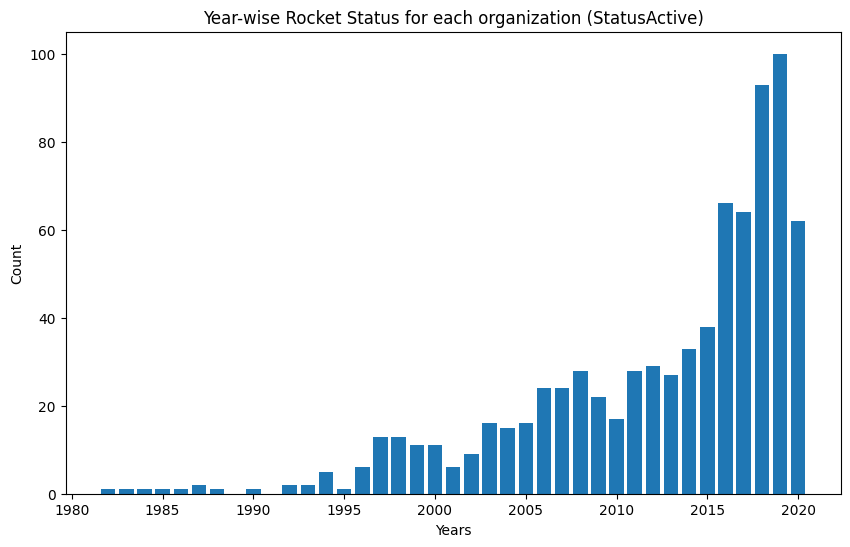

In [26]:
grouped = df[df['Rocket_Status'] == 'StatusActive'].groupby(['Rocket_Status', 'years'])['Organisation'].size().reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['years'], grouped['Count'])
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Year-wise Rocket Status for each organization (StatusActive)')
plt.show()


# Which locaton of centre has Launched the more number of Rockets


In [34]:
rocket_counts = df['Location'].value_counts()
print("Count of Rockets Launched from Each Location Center:")
print(rocket_counts)

Count of Rockets Launched from Each Location Center:
Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: count, Length: 137, dtype: int64


# Year wise Success of Launch of rockets


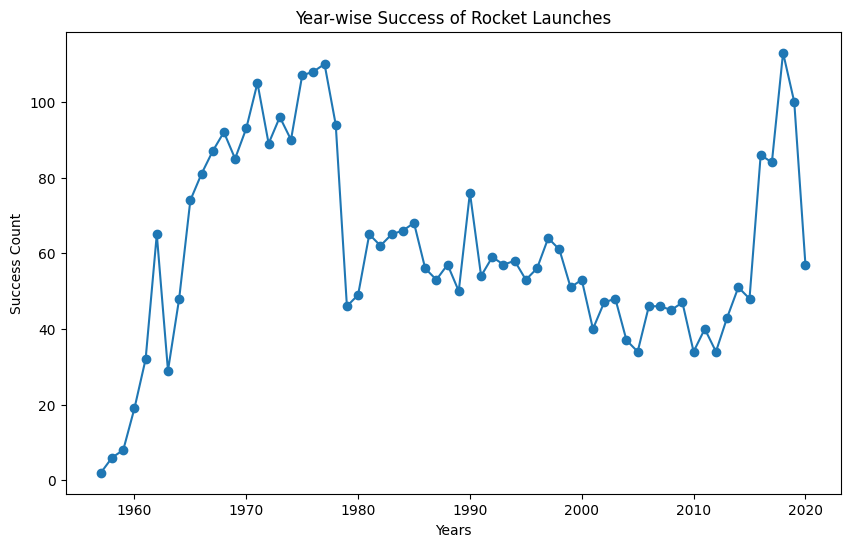

In [33]:
launch_success = df.groupby(['years', 'Mission_Status']).size().unstack(fill_value=0)
# with the Help of using line Chart
plt.figure(figsize=(10, 6))
plt.plot(launch_success.index, launch_success['Success'], marker='o')

plt.xlabel('Years')
plt.ylabel('Success Count')
plt.title('Year-wise Success of Rocket Launches')
plt.show()


# Let's Visualise the Success rate And Failure rate ans also Which Organisation has Highest Success rate and Highest Failure rate

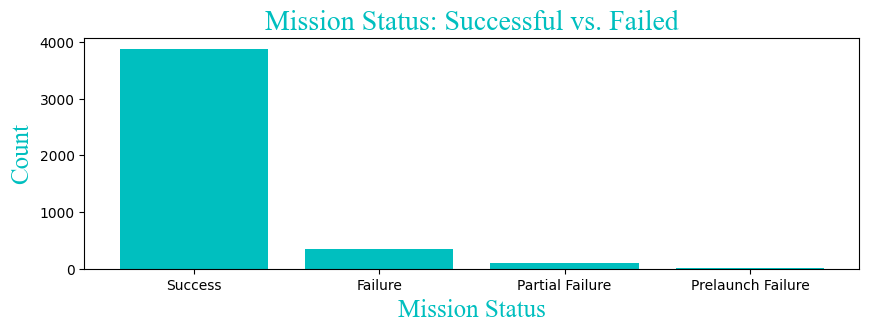

In [12]:
status_counts = df['Mission_Status'].value_counts()
plt.figure(figsize=(10,3))
plt.bar(status_counts.index, status_counts.values,color = 'c')

plt.xlabel('Mission Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =18)
plt.ylabel('Count',fontname = 'TIMES NEW ROMAN', color= 'c',size =18)
plt.title('Mission Status: Successful vs. Failed',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)

plt.show()

# Which organistion or Country has launched the most number of Rockets

In [38]:
most_launches = df['Organisation'].value_counts().idxmax()
print("Organization with the Most Number of Rockets Launched:", most_launches)


Organization with the Most Number of Rockets Launched: RVSN USSR


# Year wise launch of Rockets for each organistion or country

In [39]:
launch_counts = df.groupby(['Organisation', 'years']).size().reset_index(name='Count')
print("Year-wise Launch of Rockets for Each Organisation:")
print(launch_counts)


Year-wise Launch of Rockets for Each Organisation:
     Organisation  years  Count
0             AEB   1997      1
1             AEB   1999      1
2             AEB   2003      1
3            AMBA   1958      7
4            AMBA   1967      1
..            ...    ...    ...
658        VKS RF   2020      3
659  Virgin Orbit   2020      1
660      Yuzhmash   1969      1
661      Yuzhmash   1991      1
662       i-Space   2019      1

[663 rows x 3 columns]


# Which country has launched the most number of Rockets

In [41]:
most_launches_country = df['Country'].value_counts().idxmax()
print("Country with the Most Number of Rockets Launched:", most_launches_country)


Country with the Most Number of Rockets Launched: Russia


# Rocket Status Distribution

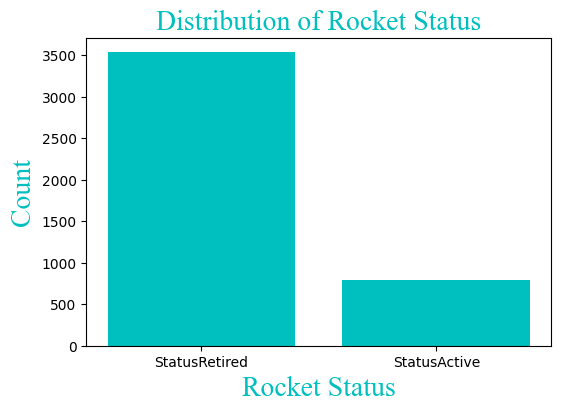

In [38]:
rocket_status_counts = df['Rocket_Status'].value_counts()

plt.figure(figsize=(6, 4)) 
plt.bar(rocket_status_counts.index, rocket_status_counts.values,color = 'c')

plt.xlabel('Rocket Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)
plt.ylabel('Count',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)
plt.title('Distribution of Rocket Status',fontname = 'TIMES NEW ROMAN', color= 'c',size =20)

plt.show()

# Year wise Launches of Rockets for each Organisation

In [40]:
launch_counts = df.groupby(['Organisation', 'years']).size().reset_index(name='Count')

print("Year-wise Launches of Rockets for Each Organisation:")
print(launch_counts)


Year-wise Launches of Rockets for Each Organisation:
     Organisation  years  Count
0             AEB   1997      1
1             AEB   1999      1
2             AEB   2003      1
3            AMBA   1958      7
4            AMBA   1967      1
..            ...    ...    ...
658        VKS RF   2020      3
659  Virgin Orbit   2020      1
660      Yuzhmash   1969      1
661      Yuzhmash   1991      1
662       i-Space   2019      1

[663 rows x 3 columns]


# Which organisation has most number Mission status with Sucess or Failure

In [49]:
mission_counts = df[df['Mission_Status'].isin(['Success', 'Failure'])]['Organisation'].value_counts()
most_missions_organisation = mission_counts.idxmax()
print("Organization with the Most Number of Missions (Success or Failure):", most_missions_organisation)


Organization with the Most Number of Missions (Success or Failure): RVSN USSR


# Which Organisation has most numberof launches

In [50]:
most_launches_organisation = df['Organisation'].value_counts().idxmax()
print("Organization with the Most Number of Launches:", most_launches_organisation)


Organization with the Most Number of Launches: RVSN USSR


# Conculsion

 1) Launche Date of Rockets by Year wise
 2) Mission Launches by a Country by percentage Wise
 3) Active Count of Rockets by each Country
 4) How Many Rockets are active Currently Right Now : There are 790 Rockets are Active.
 5) Year wise Rocket Status for each organistion its Active or Not as been Shown.
 6) Which locaton of centre has Launched the more number of Rockets : Site 31/6, Baikonur Cosmodrome, Kazakhstan 235 as 
    Launched more no of Rockets.
 7) Year wise Success of Launch of rockets
 8) Let's Visualise the Success rate And Failure rate ans also Which Organisation has Highest Success rate and Highest Failure     rate
 9) Which organistion or Country has launched the most number of Rockets : RVSN USSR
 10) Year wise launch of Rockets for each organistion or country
 11) Which country has launched the most number of Rockets : Russia
 12) Rocket Status Distribution
 13) Year wise Launches of Rockets for each Organisation
 14) Which organisation has most number Mission status with Sucess or Failure :  RVSN USSR
 15) Which Organisation has most numberof launches :  RVSN USSR